# 서울시 시간대별 인구분석, 함수로 재구성 하기
### 함수 작성하기

 - 인구데이터 csv와 동코드 csv 파일을 읽어서 data, code_data를 생성하는 함수

In [1]:
import csv

def file_open():
    # 1-1. 인구 데이터 파일 읽기
    filePath = './seoul_dong_people_201912.csv'
    f = open(filePath, encoding='utf8')
    data = csv.reader(f)
    next(data)
    data = list(data) 
    
    # 1-2. 행정동코드 데이터 파일 읽기
    f2 = open('./dong_code.csv', encoding='cp949')
    code_data = csv.reader(f2)
    next(code_data)
    next(code_data)
    code_data = list(code_data)
    
    # 1-3. 데이터타입 변환하기 : 문자 -> 숫자
    # 인구데이터의 변환하기
    for row in data :
        for i in range(1, 32):
            if i <= 2: # 인덱스가 2이하인 경우(시간대구분, 행정동코드 등)
                row[i] = int(row[i]) # 정수형으로 변환
            else : # 인덱스다 2초과인 경우(총생활인구수부터)
                row[i] = float(row[i]) # 실수형으로 변환
    
    # 행정동의 코드 변환하기
    for row in code_data :
        row[1] = int(row[1])
    
    return data, code_data

 - 동명을 전달받아서 동코드를 찾아주는 함수

In [2]:
def dong_search(dong_name):
    for row in code_data :
        if row[-1] == dong_name:
            code = row[1]
    print(dong_name, '-', code, '를 분석합니다.')
    return code

In [3]:
import matplotlib.pyplot as plt

def graph_plot(popu_list, label_list, graph_title) :
    plt.figure(dpi=120)
    plt.rc('font', family='AppleGothic')
    plt.title(graph_title)
    
    for i in range(len(popu_list)) :
        plt.plot(range(24), popu_list[i], label = label_list[i])
    plt.legend()
    plt.xlabel('시간대')
    plt.ylabel('평균인구수')
    plt.xticks(range(24), range(24))
    plt.show()

 - 입력한 행정동의 시간대별 평균인구 분석 및 시각화
    - 파라미터 : 동명, 코드 

In [4]:
def analysis1(dong_name, dong_code):
    # 입력된 행정동의 시간대별 평균인구 구하기
    population = [0 for i in range(24)]
    # 반복작업
    for row in data :
        if row[2] == dong_code:
            time, p = row[1], row[3] # 시간대, 총생활인구수
            population[time] += p # 해당 시간대에 누적

    # 31일로 나눠서 평균 인구수 구하기
    population = [p/31 for p in population]
    
    population = [population]
    labels = ['평균인구']
    title = dong_name + '시간대별 평균인구'
    graph_plot(popu_list=population, label_list=labels, graph_title=title)

In [8]:
# 인구데이터, 동코드 데이터 읽는 함수 호출
data, code_data = file_open()

# 데이터 확인
len(data), len(code_data)

(315456, 424)

인구분석을 원하는 행정동을 입력 ---> 압구정동
압구정동 - 11680545 를 분석합니다.


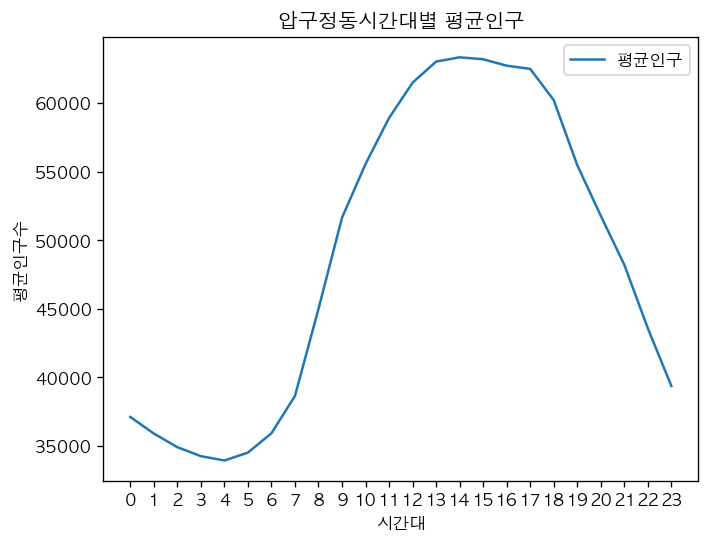

In [9]:
# 행정동 입력 받기
input_name = input('인구분석을 원하는 행정동을 입력 ---> ')
input_code = dong_search(input_name)

# 행정동 인구분석 함수 호출
analysis1(dong_name=input_name, dong_code= input_code)

 - 입력된 행정동의 주중, 주말 인구 분석 함수

In [14]:
import datetime

def analysis2(dong_name, dong_code) :
    # 4-1 입력된 행정동의 주중/주말 시간대별 평균인구 구하기
    weekday = [0 for i in range(24)] # 주중 시간별 인구 저장
    weekend = [0 for i in range(24)] # 주말 시간별 인구 저장

    #datetime.date(year, mon, day).weekday()
    for row in data :
        if row[2] == dong_code :
            time, p = row[1], row[3]
            year, mon, day = int(row[0][:4]), int(row[0][4:6]), int(row[0][6:])
            num = datetime.date(year, mon, day).weekday()
            if num < 5 :
                weekday[time] += p
            else : 
                weekend[time] += p
                
    # 구해진 주중/주말 일수로 시간별 인구수 나누기
    weekday_cnt, weekend_cnt = 0, 0
    for i in range(1, 32) :
        if datetime.date(2019, 12, i).weekday() < 5 :
            weekday_cnt += 1
        else : 
            weekend_cnt += 1
    # 리스트 컴프리헨션으로 리스트에 들어있는 주중 시간별 인구를 일수로 나누기
    weekday = [w / weekday_cnt for w in weekday]

    # 리스트 컴프리헨션으로 리스트에 들어있는 주말 시간별 인구를 일수로 나누기
    weekend = [w / weekend_cnt for w in weekend]
    
    population = [weekday, weekend]
    labels = ['주중인구', '주말인구']
    title = dong_name + '시간대별 평균인구'
    graph_plot(popu_list=population, label_list=labels, graph_title=title)

인구분석을 원하는 행정동을 입력 ---> 압구정동
압구정동 - 11680545 를 분석합니다.


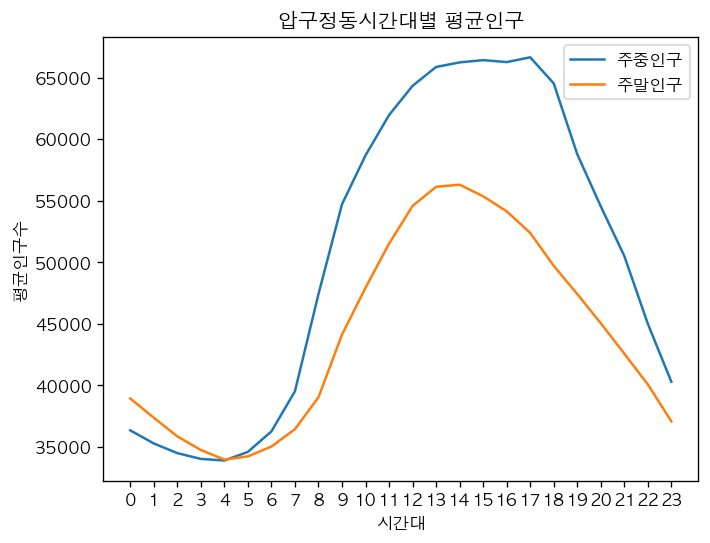

In [15]:
# 행정동 입력 받기
input_name = input('인구분석을 원하는 행정동을 입력 ---> ')
input_code = dong_search(input_name)

# 행정동 인구분석 함수 호출
analysis2(dong_name=input_name, dong_code= input_code)

In [18]:
def analysis3(dong_name, dong_code):
    # 남성 시간별 인구
    male = [0 for i in range(24)]

    # 여성 시간별 인구
    female = [0 for i in range(24)]

    for row in data:
        if row[2] == dong_code :
            time = row[1]
            # 남성 인구 총합 구하기 (csv의 4 ~ 17 컬럼)
            male[time] += sum(row[4:18])
            # 여성 인구 총합 구하기 (csv의 18 ~ 31 컬럼)
            female[time] += sum(row[18:32])
        
    male = [m / 31 for m in male]
    female = [f / 31 for f in female]
    
    data_set = [male, female]
    labels = ['남성', '여성']
    title = dong_name + ' 남여 시간대별 평균인구'
    graph_plot(popu_list=data_set, label_list=labels, graph_title=title)

인구분석을 원하는 행정동을 입력 ---> 압구정동
압구정동 - 11680545 를 분석합니다.


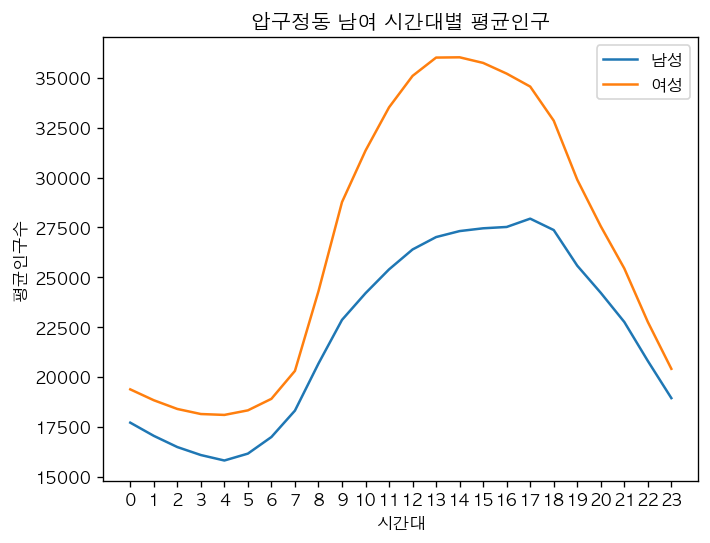

In [19]:
# 행정동 입력 받기
input_name = input('인구분석을 원하는 행정동을 입력 ---> ')
input_code = dong_search(input_name)

# 행정동 인구분석 함수 호출
analysis3(dong_name=input_name, dong_code= input_code)

 - analysis1 기존 함수에 graph_yn 매개변수 추가
     - 그래프 그리기가 필요하면 y, 없으면 n

In [23]:
# graph_yn 매개변수 추가 : 그래프 그리기가 필요하면 y, 없으면 n
def analysis4(dong_name, dong_code, graph_yn = 'y'):
    population = [0 for i in range(24)]
    # 반복작업
    for row in data :
        if row[2] == dong_code:
            time, p = row[1], row[3] # 시간대, 총생활인구수
            population[time] += p # 해당 시간대에 누적

    # 31일로 나눠서 평균 인구수 구하기
    population = [p/31 for p in population]
    
    # 그래프를 그리지 않는 경우 해당 동의 인구 리스트를 반환하고 종료
    if graph_yn == 'n':
        return population
    
    
    # 평균인구 리스트로 꺾은선 그래프 그리기
    population = [population]
    labels = ['평균인구']
    title = dong_name + '시간대별 평균인구'
    graph_plot(popu_list=population, label_list=labels, title=title)

In [40]:
def analysis5(dong_name1, dong_code1):
    # 비교할 지역을 입력받아 행정동코드 조회
    dong_name2 = input('인구분석을 원하는 행정동을 입력하세요 -> ')
    dong_code2 = dong_search(dong_name2)

    # 두 지역의 시간대별 평균인구 구하기
    population1 = analysis4(dong_name=dong_name1, dong_code=dong_code1, graph_yn='n')
    population2 = analysis4(dong_name=dong_name2, dong_code=dong_code2, graph_yn='n')
    
    # 위에서 구한 두 지역의 시간대별 평균인구 리스트로 꺾은선 그래프 그리기
    data_set = [population1, population2]
    labels = [dong_name1, dong_name2]
    title = dong_name1+'/'+dong_name2+' 시간대별 평균인구'
    graph_plot(popu_list=data_set, label_list=labels, graph_title=title)

 - 행정동 입력받기

인구분석을 원하는 행정동을 입력하세요 : 압구정동
압구정동 - 11680545 를 분석합니다.
인구분석을 원하는 행정동을 입력하세요 -> 역삼2동
역삼2동 - 11680650 를 분석합니다.


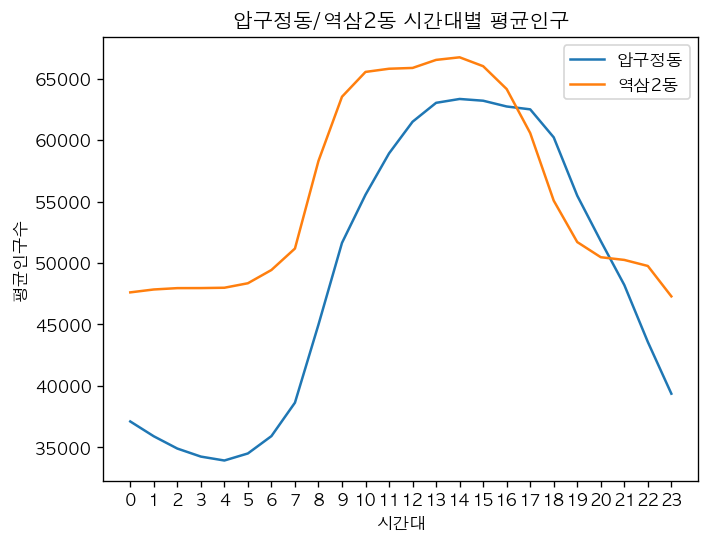

In [41]:
# data, code_data = file_open()
input_name = input('인구분석을 원하는 행정동을 입력하세요 : ')
input_code = dong_search(input_name)

analysis5(dong_name1= input_name, dong_code1= input_code)

방문하고 싶은 장소, 언제 가야 한산한가?
인구분석을 원하는 행정동을 입력하세요 : 압구정동
압구정동 - 11680545 를 분석합니다.
1. 시간별 평균 인구분석
2. 평일 또는 주말 언제가 좋은가?
3. 남/녀 비율은?
4. 내가 자주가는 곳과 비교 결과는?
분석하고 싶은 내용의 번호를 입력해 주세요 --> 4
인구분석을 원하는 행정동을 입력하세요 -> 역삼2동
역삼2동 - 11680650 를 분석합니다.


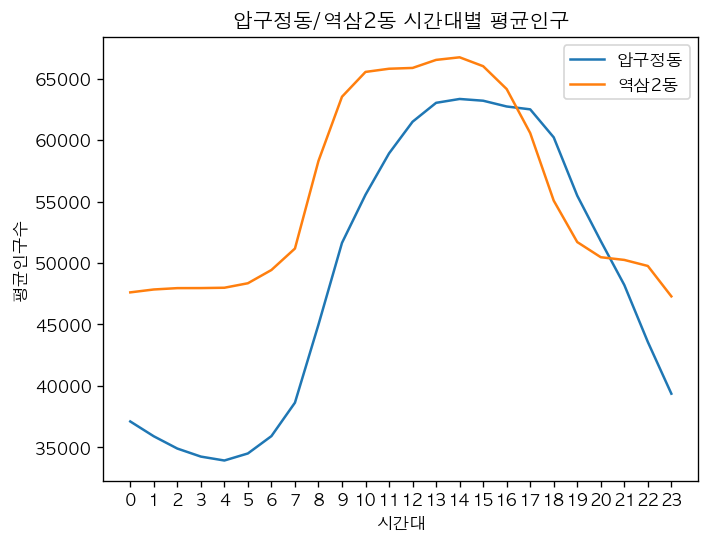

In [46]:
print('방문하고 싶은 장소, 언제 가야 한산한가?')

#행정동 입력 받기
input_name = input('인구분석을 원하는 행정동을 입력하세요 : ')
input_code = dong_search(input_name)

print('1. 시간별 평균 인구분석')
print('2. 평일 또는 주말 언제가 좋은가?')
print('3. 남/녀 비율은?')
print('4. 내가 자주가는 곳과 비교 결과는?')

selection = int(input('분석하고 싶은 내용의 번호를 입력해 주세요 --> '))
if selection == 1:
    analysis1(dong_name=input_name, dong_code = input_code)
elif selection == 2: 
    analysis2(dong_name=input_name, dong_code = input_code)
elif selection == 3: 
    analysis3(dong_name=input_name, dong_code = input_code)
elif selection == 4: 
    analysis5(dong_name1=input_name, dong_code1 = input_code)
